In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
print("Movies shape:", movies.shape)
print("Credits shape:", credits.shape)

Movies shape: (4803, 20)
Credits shape: (4803, 4)


In [5]:
data = movies.merge(credits, left_on='title', right_on='title')

print("Merged shape:", data.shape)

Merged shape: (4809, 23)


In [6]:
data = data[['title','budget','revenue','vote_average','popularity']]
data.dropna(inplace=True)

In [7]:
data = data[data['budget'] > 0]   # remove zero budget movies
data['profit'] = data['revenue'] - data['budget']

In [8]:
data['success'] = data['profit'].apply(lambda x: 1 if x > 0 else 0)

print(data.head())


                                      title     budget     revenue  \
0                                    Avatar  237000000  2787965087   
1  Pirates of the Caribbean: At World's End  300000000   961000000   
2                                   Spectre  245000000   880674609   
3                     The Dark Knight Rises  250000000  1084939099   
4                               John Carter  260000000   284139100   

   vote_average  popularity      profit  success  
0           7.2  150.437577  2550965087        1  
1           6.9  139.082615   661000000        1  
2           6.3  107.376788   635674609        1  
3           7.6  112.312950   834939099        1  
4           6.1   43.926995    24139100        1  


In [9]:
X = data[['budget','vote_average','popularity']]
y = data['success']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))


Model Accuracy: 0.7400530503978779

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.58      0.60       255
           1       0.79      0.82      0.81       499

    accuracy                           0.74       754
   macro avg       0.71      0.70      0.70       754
weighted avg       0.74      0.74      0.74       754



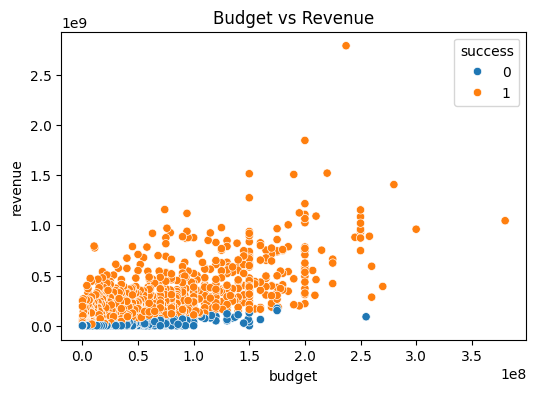

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['budget'], y=data['revenue'], hue=data['success'])
plt.title("Budget vs Revenue")
plt.show()

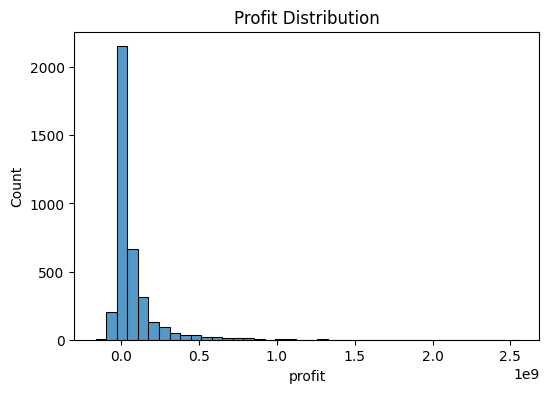

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data['profit'], bins=40)
plt.title("Profit Distribution")
plt.show()